In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Template for operation

'''data_path='ipl.csv'

data=pd.read_csv(data_path)		
print(data.describe())

col=data.columns

print(col)

plt.show()'''

'''df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()'''

"df = pd.DataFrame({\n    'name':['john','mary','peter','jeff','bill','lisa','jose'],\n    'age':[23,78,22,19,45,33,20],\n    'gender':['M','F','M','M','M','F','M'],\n    'state':['california','dc','california','dc','california','texas','texas'],\n    'num_children':[2,0,0,3,2,1,4],\n    'num_pets':[5,1,0,5,2,2,3]\n})\n\nax = plt.gca()\n\ndf.plot(kind='line',x='name',y='num_children',ax=ax)\ndf.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)\n\nplt.show()"

In [26]:
fname=input("Enter filename:")

fread=open(fname,"r")

#data=fread.read() 

datadict={} #Dictionary for dataframe
xlabels=[] #List for xlabels

Enter filename:hello.txt


In [27]:
with fread as file:     
    for line in file: 

            for word in line.split():
                word2=word.lower()
                
                #print(word)
                if word2 in datadict:
                    datadict[word2]+=1
                else:
                    datadict[word2]=1
                    xlabels.append(word2)      
            
print(datadict)
print("\n",xlabels)            

{'when': 3, 'the': 10, 'clouds': 1, 'covered': 1, 'shine,': 1, 'a': 2, 'downpour': 1, 'made': 1, 'my': 8, 'streets': 1, 'aquatic.': 1, 'timber': 1, 'was': 1, 'ready,': 1, 'waters': 1, 'were': 1, 'mine,': 1, 'but': 1, 'i': 10, 'had': 2, 'lost': 3, 'captain': 1, 'of': 5, 'titanic.': 1, 'now': 2, 'don’t': 2, 'shatter': 1, 'any': 2, 'windows,': 1, 'no': 1, 'bedsheets': 1, 'worn': 1, 'around': 1, 'neck,': 1, 'kill': 1, 'imaginary': 1, 'foes,': 1, 'have': 2, 'that': 3, 'superhero': 1, 'from': 1, 'deck.': 1, 'aimed': 1, 'far,': 1, 'shadow': 1, 'held': 1, 'hand': 1, 'and': 2, 'wind': 1, 'pushed': 1, 'me': 2, 'out': 2, 'black.': 1, 'realized': 1, 'reached': 1, 'distant': 1, 'land': 1, 'way': 1, 'coming': 1, 'back.': 1, 'ran': 1, 'pages': 1, 'childhood': 1, 'diary-': 1, 'it’s': 1, 'time': 1, 'for': 2, 'to': 2, 'open': 1, 'eyes,': 1, 'move': 1, 'world': 1, 'which': 1, 'once': 1, 'thought': 1, 'dreary,': 1, 'this': 1, 'is': 1, 'process,': 1, 'quintessene': 1, 'our': 1, 'lives.': 1}

 ['when', 'the

In [33]:
df=pd.DataFrame.from_dict([datadict])
df.describe()
col=df.columns
df=df.transpose()
headd=df.head(10)

/home/anuran/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


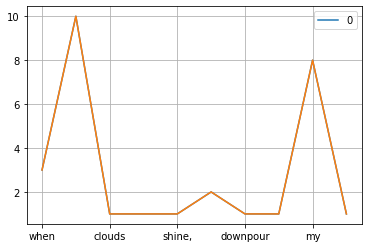

In [34]:
headd.plot(subplots = False, grid = True)
plt.plot(headd)